# Holistic Health Group Project

## Project Set-Up

### Create Git Repository

```
cd "./Data Science/M6006_assignment3_23407618514"
git clone https://github.com/tabsbower/M6006_assignment3_23407618514
```

### Purpose of the project

In recent years, data-driven decision making has become a transformative part of the healthcare process (Bandi et al., 2024). Whilest they face challenges such as data privacy concerns, issues with integrating with current systems and potential biases, predictive modelling now plays a vital role in improving patient outcomes (Adeniran et al., 2024). In light of this, the purpose of this project is to discover which variables, or comnbination of variables, are the best predictors of overall health score in order to make suggestions about where real-world interventions could be deployed.



## Introduction

### Description of Dataset

This is a synthetic dataset based on trends in real healthcare data. It evaluates individuals' overrall health and well-being based on multiple physical and lifestyle factors. Each row represents a person’s health and lifestyle attributes, scored from real-world patterns, to predict an Overall Health Score (0–100).

### Research questions

- How do lifestyle factors (smoking, alcohol, nutrition) predict health outcomes?
- Are mental well-being factors (sleep, mindfulness, stress) associated more or less than physical factors (nutrition, excersise, hydration) with health?
- Can we predict whether someone is a ....

#### Hypothesis

Sleep, Stress, and Mindfulness are more influential predictors of Overall Health Score than physical factors.

### Load Relevant Libraries and the Data

In [ ]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 


In [2]:
#load data
df = pd.read_csv('holistic_health_lifestyle_dataset.csv')
df.head()

Physical_Activity  Nutrition_Score  Stress_Level  Mindfulness  Sleep_Hours  \
0          54.934283         5.643011      5.696572     0.000000     6.292214   
1          42.234714         6.389001      5.566647     4.450144     8.519054   
2          57.953771         5.805238      3.126960     9.129716     6.702720   
3          75.460597         7.220836      6.159168    16.496689     7.135854   
4          40.316933         9.394357      2.019835    25.241623     8.076086   

   Hydration        BMI   Alcohol   Smoking  Overall_Health_Score  \
0   2.578565  24.275932  4.280610  8.984006             36.950187   
1   2.448713  25.970141  7.461846  3.223304             55.167774   
2   3.261433  25.193857  0.000000  4.600482             78.304426   
3   3.726265  19.527300  9.958423  3.947706             94.018274   
4   3.049478  23.348229  4.320347  8.084322            100.000000   

  Health_Status  
0          Poor  
1       Average  
2          Good  
3          Good  
4          Good

In [3]:
#create a numeric version of the Health_Status column
df['Health_Status_numeric'] = df['Health_Status'].map({'Poor': 1, 'Average': 2, 'Good':3 })
df.head()

Physical_Activity  Nutrition_Score  Stress_Level  Mindfulness  Sleep_Hours  \
0          54.934283         5.643011      5.696572     0.000000     6.292214   
1          42.234714         6.389001      5.566647     4.450144     8.519054   
2          57.953771         5.805238      3.126960     9.129716     6.702720   
3          75.460597         7.220836      6.159168    16.496689     7.135854   
4          40.316933         9.394357      2.019835    25.241623     8.076086   

   Hydration        BMI   Alcohol   Smoking  Overall_Health_Score  \
0   2.578565  24.275932  4.280610  8.984006             36.950187   
1   2.448713  25.970141  7.461846  3.223304             55.167774   
2   3.261433  25.193857  0.000000  4.600482             78.304426   
3   3.726265  19.527300  9.958423  3.947706             94.018274   
4   3.049478  23.348229  4.320347  8.084322            100.000000   

  Health_Status  Health_Status_numeric  
0          Poor                      1  
1       Average                      2  
2          Good                      3  
3          Good                      3  
4          Good                      3

## Clean and Explore the Data

### Exploring the Data

   | Column Name            | Description     |
   | ---------------------- | --------------- |
   | Physical_Activity      | Minutes of moderate to vigorous exercise per day (0–120)     |
   | Nutrition_Score        | Diet quality (0–10) based on nutrient density, balance, and variety    |
   | Stress_Level           | Self-reported stress (1–10), where 10 = very high stress|
   | Mindfulness             | Minutes per day spent in meditation, journaling, or mindful activity (0–60)         |
   | Sleep_Hours            | Average hours of sleep per night (3–10)        |
   | Hydration              | Liters of water consumed per day (0.5–5.0)    |
   | BMI                    | Body Mass Index (18–40)      |
   | Alcohol                | Units of alcohol per week (0–20)  |
   | Smoking                | Cigarettes per day (0–30) |
  
 

We will now explore the data using .describe(), .info() and shape

In [4]:
df.describe()

Physical_Activity  Nutrition_Score  Stress_Level   Mindfulness  \
count       10000.000000     10000.000000  10000.000000  10000.000000   
mean           45.047069         6.966599      4.987202     15.224636   
std            19.832871         1.883295      1.938195      9.454891   
min             0.000000         0.000000      1.000000      0.000000   
25%            31.548189         5.675978      3.599696      8.053871   
50%            44.948100         7.031693      4.988464     14.896178   
75%            58.421618         8.387730      6.327795     21.790305   
max           120.000000        10.000000     10.000000     52.278333   

        Sleep_Hours     Hydration           BMI       Alcohol       Smoking  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       7.000194      2.503302     24.095086      3.523663      5.706911   
std        1.468580      0.801660      3.356663      3.270784      5.000260   
min        3.000000      0.500000     18.000000      0.000000      0.000000   
25%        6.003898      1.958461     21.653393      0.298894      1.065818   
50%        7.014341      2.506579     24.072122      2.980658      4.954994   
75%        8.025752      3.052666     26.380536      5.706382      8.991626   
max       10.000000      5.000000     36.376168     18.040621     27.978693   

       Overall_Health_Score  Health_Status_numeric  
count          10000.000000           10000.000000  
mean              78.227945               2.634100  
std               19.697853               0.561826  
min                2.217088               1.000000  
25%               64.627060               2.000000  
50%               81.118118               3.000000  
75%               97.972163               3.000000  
max              100.000000               3.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Physical_Activity      10000 non-null  float64
 1   Nutrition_Score        10000 non-null  float64
 2   Stress_Level           10000 non-null  float64
 3   Mindfulness            10000 non-null  float64
 4   Sleep_Hours            10000 non-null  float64
 5   Hydration              10000 non-null  float64
 6   BMI                    10000 non-null  float64
 7   Alcohol                10000 non-null  float64
 8   Smoking                10000 non-null  float64
 9   Overall_Health_Score   10000 non-null  float64
 10  Health_Status          10000 non-null  object 
 11  Health_Status_numeric  10000 non-null  int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 937.6+ KB


From the above we can see that the dataset has no NaN values that need to be dealt with.

We will now rename the columns in our dataset to make the data more readable.

### Clean the Data

We did not adopt any cleaning techniques on this data as there were no missing values and we were satisfied with labels

## Exploratory Data Analysis
- visualising distributions
- correlation heatmaps
- group compaisions 

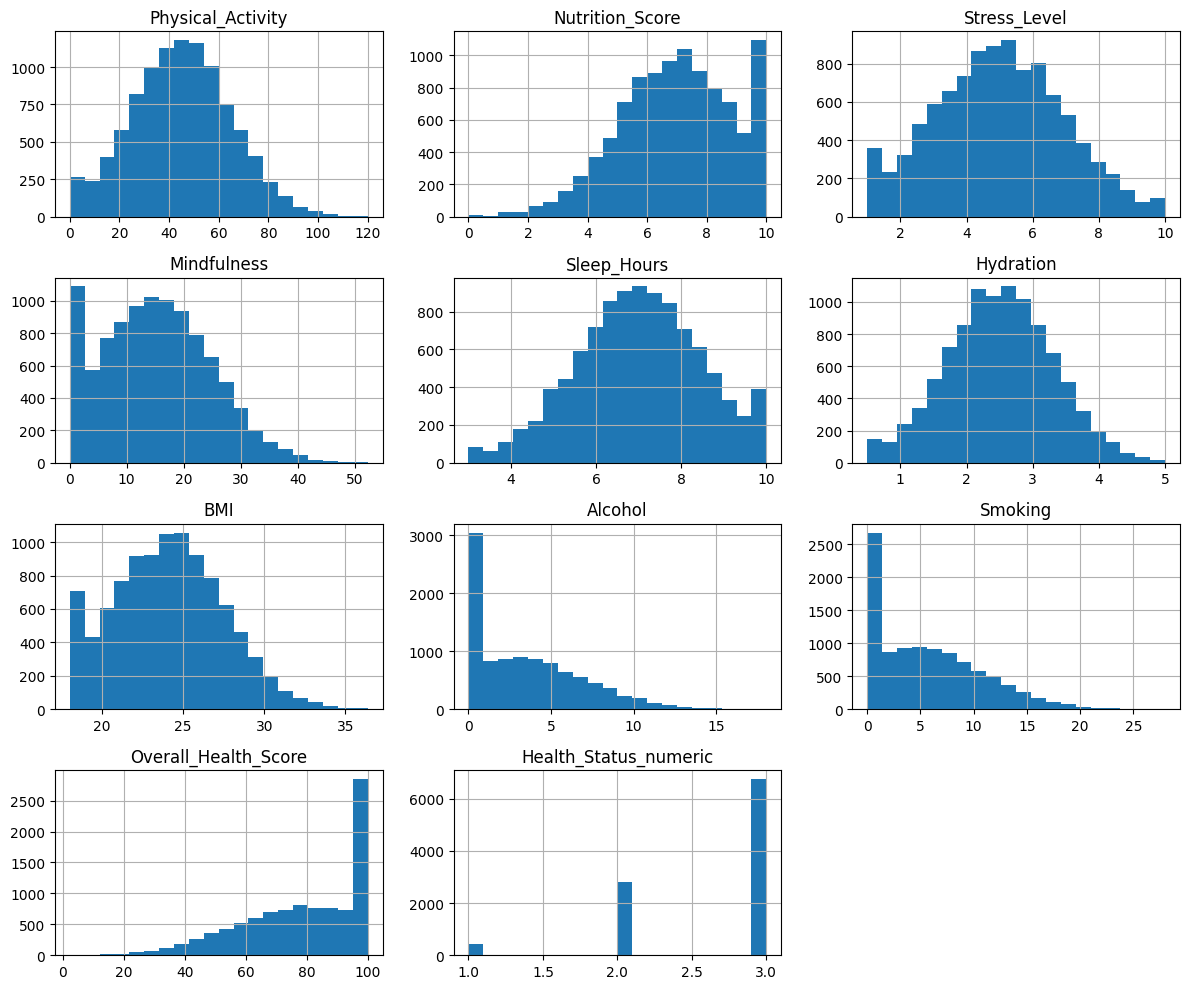

In [6]:
#plot the distribution of each column
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

In [73]:
df['Alcohol'] = np.log1p(df['Alcohol'])
df['Smoking'] = np.log1p(df['Smoking'])

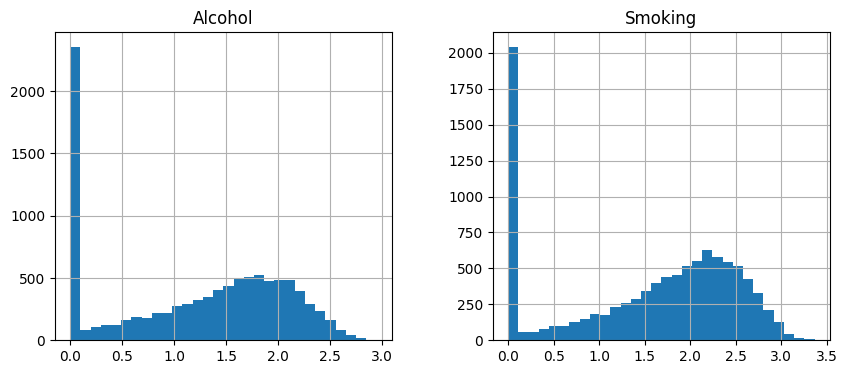

In [74]:
df[['Alcohol', 'Smoking']].hist(bins=30, figsize=(10, 4))
plt.show()

What do we notice so far? 
Most variables / columns have a bell shaped distribution of data but with some columns such as nutrition score, mindfulness and BMI have high counts at one end of their scales 
Alcohol and smoking have a high counts for 0. 
It looks like most of the people in this dataset have an excellent health status.

### Variable transformation

#### Binarising Smoking and Drinking
This will be helpful when analysing how smoking and drinking effect our variables, when wanting to study those that do or don't smoke and drink specifically 

In [75]:
df['Alcohol_binary'] = df['Alcohol'].apply(lambda x: 1 if x > 0 else 0)
df['Smoking_binary'] = df['Smoking'].apply(lambda x: 1 if x > 0 else 0)

df[['Alcohol_binary', 'Smoking_binary']].mean()

Alcohol_binary    0.7726
Smoking_binary    0.8004
dtype: float64

#### Grouped Variables

In [76]:
# Physical factors group
physical_factors = [
    'Smoking',
    'Alcohol',
    'Nutrition_Score',
    'Physical_Activity',
    'BMI',
    'Hydration']

physical_df = df[physical_factors]

In [77]:
df['Healthy_Lifestyle_Index'] = (
    df['Nutrition_Score'] +
    df['Physical_Activity'] +
    df['Hydration'] -
    df['Smoking'] -
    df['Alcohol'] )

In [10]:
# Mental factors group
mental_factors = [
    'Mindfulness',
    'Sleep_Hours',
    'Stress_Level']

mental_df = df[mental_factors]

In [71]:
df['Healthy_Mental_Index'] = (
    df['Sleep_Hours'] +
    df['Mindfulness'] -
    df['Stress_Level'])

In [13]:
physical_df = df[physical_factors].copy()
mental_df = df[mental_factors].copy()

### Correlation

#### Heatmap

In [14]:
columns = ['Physical_Activity', 'Nutrition_Score', 'Stress_Level', 'Mindfulness', 'Sleep_Hours', 'Hydration', 'BMI', 'Alcohol', 'Smoking', 'Overall_Health_Score', 'Health_Status_numeric']   
corr_matrix = df[columns].corr() # Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='gray')
plt.title("Correlation Heatmap of Health Variables")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Pairplot

C:\Users\zhahla.mohamed\AppData\Local\Temp\ipykernel_17016\3356496728.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['BMI'], df['Nutrition_Score']], labels=['BMI', 'Nutrition'])


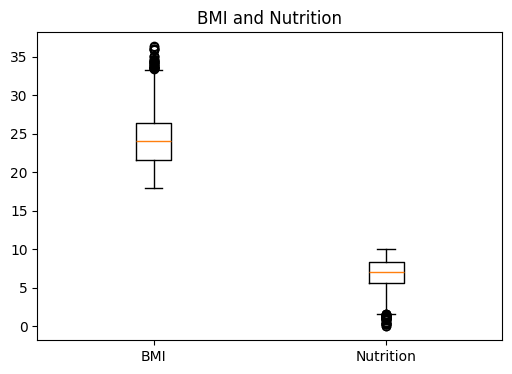

In [16]:
plt.figure(figsize=(6, 4))
plt.boxplot([df['BMI'], df['Nutrition_Score']], labels=['BMI', 'Nutrition'])
plt.title('BMI and Nutrition')
plt.show()

#### Group Comparisons

# Regression Analysis on the Data

## Simple Linear Regression

### Comparing the variable's infuence of the variables over predicting Overall Health Score

#### R-squared

In [17]:
predictors = ['Sleep_Hours', 'Stress_Level', 'Nutrition_Score', 'Physical_Activity', 
              'BMI', 'Hydration', 'Mindfulness', 'Alcohol', 'Smoking']

for var in predictors:
    X = df[[var]]
    y = df['Overall_Health_Score']

    #train/test split (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    #fit model on training only
    model = LinearRegression()
    model.fit(X_train, y_train)

    #predict on test set
    y_pred = model.predict(X_test)

    #evaluate on the test set
    test_r2 = r2_score(y_test, y_pred)

    print(f"{var}: Test R-squared = {test_r2:.4f}")

Sleep_Hours: Test R-squared = 0.0292
Stress_Level: Test R-squared = 0.0113
Nutrition_Score: Test R-squared = 0.1380
Physical_Activity: Test R-squared = 0.0213
BMI: Test R-squared = 0.0267
Hydration: Test R-squared = 0.0138
Mindfulness: Test R-squared = 0.5099
Alcohol: Test R-squared = 0.0359
Smoking: Test R-squared = 0.1045


It looks like mindfulness has the highest R squared, then nutrition and smoking, suggesting these 3 variables ....

#### Simple Linear Regression

note to us / TASK - here we could write more detailed analysis of the results from each simple linear regression test! 

### Multiple linear regression

In [ ]:
physical_score = BMI + hybrattion

In [ ]:
formula = 'health ~ hydration + stress'
formula = 'health ~ physical_score * mental_score'

In [27]:
X = df[predictors]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.907
Model:                              OLS   Adj. R-squared:                  0.907
Method:                   Least Squares   F-statistic:                 1.082e+04
Date:                  Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                          21:13:44   Log-Likelihood:                -32121.
No. Observations:                 10000   AIC:                         6.426e+04
Df Residuals:                      9990   BIC:                         6.433e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

In [28]:
X = df[physical_factors]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.336
Model:                              OLS   Adj. R-squared:                  0.336
Method:                   Least Squares   F-statistic:                     842.7
Date:                  Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                          21:13:44   Log-Likelihood:                -41947.
No. Observations:                 10000   AIC:                         8.391e+04
Df Residuals:                      9993   BIC:                         8.396e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

In [29]:
X = df[mental_factors]
y = df['Overall_Health_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Overall_Health_Score   R-squared:                       0.557
Model:                              OLS   Adj. R-squared:                  0.557
Method:                   Least Squares   F-statistic:                     4194.
Date:                  Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                          21:13:44   Log-Likelihood:                -39920.
No. Observations:                 10000   AIC:                         7.985e+04
Df Residuals:                      9996   BIC:                         7.988e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.5692     

It looks like mental factors (mindfulness, sleep hours and stress levels) predict the overall health score better than physical factors as the multiple linear regression test for mental factors had a higher R squared value. 

#### Training the Data 

In [30]:
#training/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
train_r2 = model.score(X_train, y_train)
test_r2  = model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Train R²:", train_r2)
print("Test R²: ", test_r2)
print("RMSE:    ", rmse)

Train R²: 0.5600941922306346
Test R²:  0.5451522443404384
RMSE:     13.277629575287744


In [34]:
#cooefficients
coef_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_})

print("\nCoefficients:")
print(coef_table)


Coefficients:
        Feature  Coefficient
0         const     0.000000
1   Mindfulness     1.493345
2   Sleep_Hours     2.275639
3  Stress_Level    -1.386053


none of the confidence intervals cross 0, meaning that each variable holds some significance in predicting overall health score

### Logistic Regression
- confusion matrix

In [84]:
sns.pairplot(df[['Physical_Activity', 'Nutrition_Score','Mindfulness', 'Sleep_Hours', 'Stress_Level','BMI', 'Alcohol', 'Smoking', 'Hydration', 'Health_Status_numeric']], hue='Health_Status_numeric')   

In [37]:
X_log = df[['Physical_Activity', 'Nutrition_Score', 'Stress_Level', 'Mindfulness', 'Sleep_Hours', 'Hydration','BMI', 'Alcohol', 'Smoking']]
y_log = df['Health_Status_numeric']

In [49]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.20, random_state= 42,stratify = y_log)

In [ ]:
clf = LogisticRegression(max_iter=2000, random_state=0).fit(X_train_log, y_train_log)

In [56]:
coeff_df = pd.DataFrame(clf.coef_, 
                        columns=X_log.columns, 
                        index=clf.classes_)

coeff_df.index.name = "Health Status"
print(coeff_df)



               Physical_Activity  Nutrition_Score  Stress_Level  Mindfulness  \
Health Status                                                                  
1                      -0.209408        -5.179360      2.076561    -2.078493   
2                      -0.036431        -0.900765      0.340479    -0.365203   
3                       0.245840         6.080125     -2.417040     2.443696   

               Sleep_Hours  Hydration       BMI   Alcohol   Smoking  
Health Status                                                        
1                -3.033990  -4.751507  1.218193  1.559505  1.589663  
2                -0.587274  -0.995208  0.219003  0.261115  0.257106  
3                 3.621264   5.746716 -1.437195 -1.820620 -1.846769  


In [ ]:
y_pred_log = clf.predict(X_test_log)
print("Accuracy:", accuracy_score(y_test_log, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_log, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_log, y_pred_log))

Accuracy: 0.993

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.98      0.96        84
           2       0.99      0.99      0.99       564
           3       1.00      1.00      1.00      1352

    accuracy                           0.99      2000
   macro avg       0.98      0.99      0.98      2000
weighted avg       0.99      0.99      0.99      2000


Confusion Matrix:
 [[  82    2    0]
 [   4  558    2]
 [   0    6 1346]]


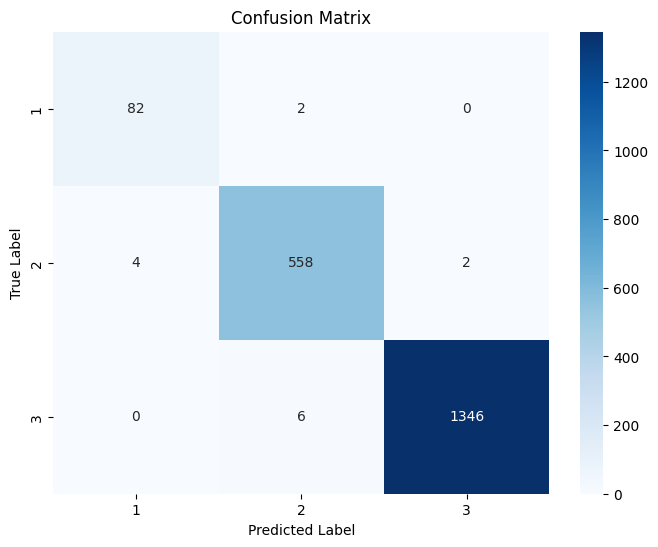

In [69]:
# Confusion matrix 
cm = confusion_matrix(y_test_log, y_pred_log)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_,
            yticklabels=clf.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [111]:
# choosing two features  - we can do this with other features we want to look at more 
feature1= 'Physical_Activity'
feature2= 'Nutrition_Score'

X2 = df[[feature1, feature2]]
y2 = df["Health_Status_numeric"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

clf2 = LogisticRegression(max_iter=300)
clf2.fit(X_train2, y_train2)

# create grid
x_min, x_max = X_train2.iloc[:,0].min()-1, X_train2.iloc[:,0].max()+1
y_min, y_max = X_train2.iloc[:,1].min()-1, X_train2.iloc[:,1].max()+1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3,
             cmap=ListedColormap(["#FFAAAA","#AAFFAA","#AAAAFF"]))
sns.scatterplot(
    x=X_train2.iloc[:,0], 
    y=X_train2.iloc[:,1],
    hue=y_train2,
    palette=["red","green","blue"]
)
plt.xlabel("Physical Actvity") # Remember to change according to the features you selected
plt.ylabel("Nutrition Score")
plt.show()



c:\Users\zhahla.mohamed\Data Science\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


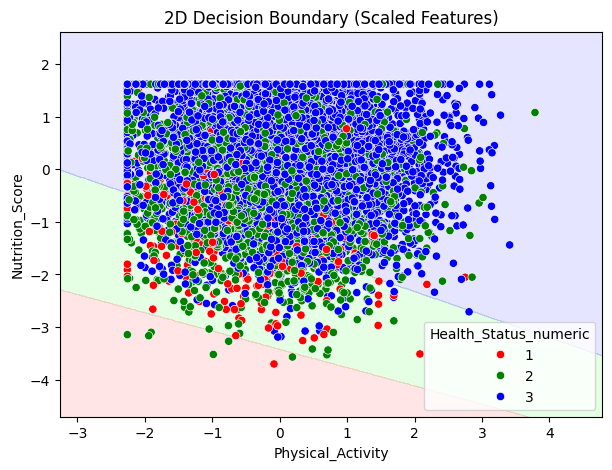

In [86]:
from sklearn.preprocessing import StandardScaler
# choosing two features
feature1 = 'Physical_Activity'
feature2 = 'Nutrition_Score'

X2 = df[[feature1, feature2]]
y2 = df["Health_Status_numeric"]

# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

# Scale data
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

# Fit model
clf2 = LogisticRegression(max_iter=300)
clf2.fit(X_train2_scaled, y_train2)

# Create grid using TRAINING data
x_min, x_max = X_train2_scaled[:,0].min() - 1, X_train2_scaled[:,0].max() + 1
y_min, y_max = X_train2_scaled[:,1].min() - 1, X_train2_scaled[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])            # or Z = clf2.predict(grid_points) if not scaled
Z = Z.reshape(xx.shape)

Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3,
             cmap=ListedColormap(["#FFAAAA","#AAFFAA","#AAAAFF"]))

sns.scatterplot(
    x=X_train2_scaled[:,0], 
    y=X_train2_scaled[:,1],
    hue=y_train2,
    palette=["red","green","blue"]
)

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("2D Decision Boundary (Scaled Features)")
plt.show()


### Comparing Mental vs Physical Predictors 

12. Advanced (Optional)
Only if you want bonus depth:
Standardisation of predictors
PCA on physical + mental factors
Clustering to detect lifestyle patterns

### Groupby

How do different factors affect each other? eg are those who smoke less likely to spend time being mindful or less likely to get more than 6 hours of sleep?
we could also look at how physical activity is associated with sleep as well as how mindfulness is associated with sleep. 


In [101]:
df.groupby(['Alcohol_binary']).agg({'Mindfulness':'mean', 'Sleep_Hours': 'mean', 'Physical_Activity': 'mean', 'Nutrition_Score': 'mean', 'Stress_Level': 'mean', 'Hydration':'mean', 'BMI': 'mean'})

Mindfulness  Sleep_Hours  Physical_Activity  Nutrition_Score  \
Alcohol_binary                                                                 
0                 15.420275      6.99603          45.586404         6.963702   
1                 15.167054      7.00142          44.888326         6.967452   

                Stress_Level  Hydration        BMI  
Alcohol_binary                                      
0                   5.001115   2.461976  24.132116  
1                   4.983106   2.515466  24.084186

In [102]:
df.groupby(['Smoking_binary']).agg({'Mindfulness':'mean', 'Sleep_Hours': 'mean', 'Physical_Activity': 'mean', 'Nutrition_Score': 'mean', 'Stress_Level': 'mean', 'Hydration':'mean', 'BMI': 'mean'})

Mindfulness  Sleep_Hours  Physical_Activity  Nutrition_Score  \
Smoking_binary                                                                 
0                 15.444378     6.995884          44.887588         6.952101   
1                 15.169838     7.001269          45.086840         6.970215   

                Stress_Level  Hydration        BMI  
Smoking_binary                                      
0                   4.993654   2.477916  24.060779  
1                   4.985593   2.509633  24.103641

In [103]:
df.groupby(['Smoking_binary', 'Alcohol_binary']).agg({'Mindfulness':'mean', 'Sleep_Hours': 'mean', 'Physical_Activity': 'mean', 'Nutrition_Score': 'mean', 'Stress_Level': 'mean', 'Hydration':'mean', 'BMI': 'mean'})

Mindfulness  Sleep_Hours  Physical_Activity  \
Smoking_binary Alcohol_binary                                                
0              0                 15.050088     6.955759          45.998940   
               1                 15.551364     7.006771          44.586036   
1              0                 15.505610     7.005313          45.491307   
               1                 15.069041     7.000055          44.965421   

                               Nutrition_Score  Stress_Level  Hydration  \
Smoking_binary Alcohol_binary                                             
0              0                      6.904910      4.958790   2.456542   
               1                      6.964906      5.003114   2.483715   
1              0                      6.977255      5.010871   2.463228   
               1                      6.968101      4.978004   2.523563   

                                     BMI  
Smoking_binary Alcohol_binary             
0              0               24.189636  
               1               24.025815  
1              0               24.118856  
               1               24.099073

In [ ]:
sns.barplot(data =df, x='mindfulness', y=, hue=, )

In [110]:
df.groupby(['Health_Status']).agg({'Mindfulness':'mean', 'Sleep_Hours': 'mean', 'Physical_Activity': 'mean', 'Nutrition_Score': 'mean', 'Stress_Level': 'mean', 'Hydration':'mean', 'BMI': 'mean', 'Smoking':'mean', 'Alcohol':'mean'})

Mindfulness  Sleep_Hours  Physical_Activity  Nutrition_Score  \
Health_Status                                                                 
Average           7.873652     6.770018          42.032492         6.303492   
Good             19.033081     7.137826          46.752465         7.365985   
Poor              3.288152     6.329216          37.830273         4.986942   

               Stress_Level  Hydration        BMI    Smoking   Alcohol  
Health_Status                                                           
Average            5.246639   2.392141  24.653552   6.923343  4.009046  
Good               4.849655   2.564449  23.790025   4.906159  3.212521  
Poor               5.459176   2.265307  25.256217  10.439667  5.276696

## Make it Shiny

Here we can make a shiny tool that based on your inputs for mindfulness, sleep hours etc will tell you what your health score is?

# Discussion of Findings

# Conclusion

# Bibliography

Adeniran, I. A., Efunniyi, C. P., Osundare, O. S., & Abhulimen, A. O. (2024). Data-driven decision-making in healthcare: Improving patient outcomes through predictive modeling. Engineering Science & Technology Journal, 5(8).

Bandi, M., Masimukku, A. K., Vemula, R., & Vallu, S. (2024). Predictive Analytics in Healthcare: Enhancing Patient Outcomes through Data-Driven Forecasting and Decision-Making. International Numeric Journal of Machine Learning and Robots, 8(8), 1-20.